# Introduction to Linear Regression

We will be using [statsmodels](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html) for learning about linear regression. It covers the models better than in scikit when we are learning and want more insights into the model parameters. But we will mainly be using scikit learn for the rest of the course. 

In [1]:
# Import the libraries required
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [3]:
# Read in data
house_data = pd.read_csv("chicagohouseprices2.csv", )

In [5]:
# Summarise the data
house_data.head()

,Unnamed: 0,Address,Neighborhood,HouseType,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
0,0,"2111 W Division St #5, Chicago IL",Wicker Park,Condo,390000,NaN,2.59,9,3.91,0,0,0,36.2,335790
1,1,"1520 W Walton St #2, Chicago IL",Wicker Park,Condo,320500,NaN,4.10,7,3.02,0,0,0,91.7,376908
2,2,"2047 W Thomas St, Chicago IL",Wicker Park,Multi-Family Home,620000,4,2.09,9,3.84,94,3049,3492,36.2,629300
3,3,"1735 N Paulina St #314, Chicago IL",Wicker Park,Condo,318000,NaN,2.40,9,2.90,0,0,0,50.0,297330
4,4,"1634 W Beach Ave, Chicago IL",Wicker Park,Multi-Family Home,477000,2,4.63,9,2.96,31,2614,1840,78.9,463644


In [4]:
# Remove the first column that's an index
house_data = house_data.drop('Unnamed: 0', 1)

In [5]:
# Look for any linear correlations in the data
house_data.corr()

,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
Price,1.000000,0.113943,0.118667,-0.034644,-0.072433,0.237720,0.443341,0.456272,-0.072403,0.983784
Bath,0.113943,1.000000,0.163785,0.166330,-0.157517,-0.039220,-0.029979,0.698526,-0.047992,0.105632
CrimeIndex,0.118667,0.163785,1.000000,0.194745,0.102382,-0.036644,-0.008807,0.070952,-0.100256,0.122793
MinutesToLoop,-0.034644,0.166330,0.194745,1.000000,0.374829,-0.023820,-0.053292,-0.032437,-0.196728,-0.034185
MilesToLake,-0.072433,-0.157517,0.102382,0.374829,1.000000,-0.047087,0.006240,-0.046517,-0.205966,-0.082604
Age,0.237720,-0.039220,-0.036644,-0.023820,-0.047087,1.000000,0.716774,0.645147,-0.029953,0.255628
LotSizeSqft,0.443341,-0.029979,-0.008807,-0.053292,0.006240,0.716774,1.000000,0.828598,-0.055458,0.454939
HouseSizeSqft,0.456272,0.698526,0.070952,-0.032437,-0.046517,0.645147,0.828598,1.000000,-0.023378,0.471783
SchoolIndex,-0.072403,-0.047992,-0.100256,-0.196728,-0.205966,-0.029953,-0.055458,-0.023378,1.000000,-0.073825
EstimatedPrice,0.983784,0.105632,0.122793,-0.034185,-0.082604,0.255628,0.454939,0.471783,-0.073825,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b61e9d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111b8d690>]], dtype=object)

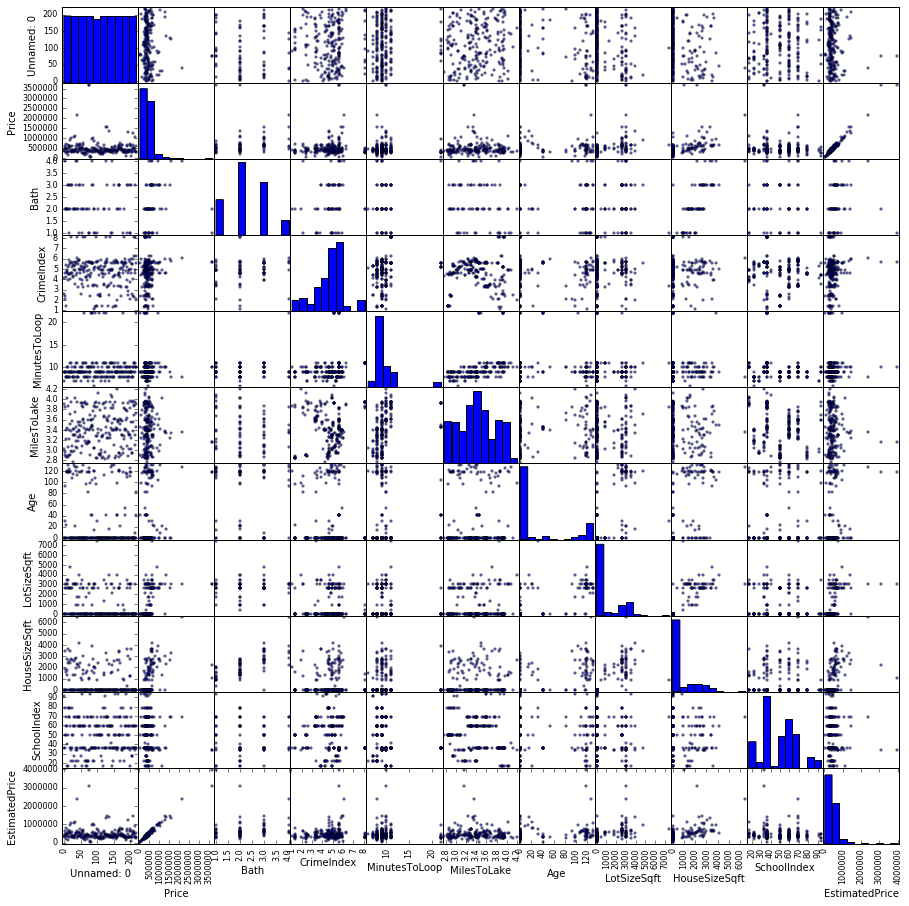

In [6]:
# Plot the data
pd.scatter_matrix(house_data, figsize=(15,15))


### Questions?

- Can you describe the data set - give a summary of what's happening?

- What looks to be affecting house prices from our initial inspection?
House Size Sqft - Price (better than lot size)
Miles to lake - Minutes to loops (increase minutes, increase miles)
Crime - minutes to lake (higher closer to lake)

- What is the type of relationship in those variables affecting price?

In [17]:
# create a fitted model in one line
lm = smf.ols(formula='Price ~ Bath + HouseSizeSqft', data=house_data).fit()

# print the coefficients
lm.params

Intercept        508310.776747
Bath             -28995.658012
HouseSizeSqft       133.011874
dtype: float64

In [18]:
# What would you expect a house price to be for a house with 3 bathrooms and 350 sqft?
# Calculate it.
threebr = 508310.7 -28995.6*3 + 133*350
print(threebr)

467873.9


In [19]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.340
Date:                Wed, 16 Dec 2015   Prob (F-statistic):              0.269
Time:                        20:02:09   Log-Likelihood:                -1030.2
No. Observations:                  70   AIC:                             2066.
Df Residuals:                      67   BIC:                             2073.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      5.083e+05   2.05e+05      2.478      0.016      9.89e+04  9.18e+05
Bath            -2.9e+04   1.16e+05     -0.250      0.803     -2.61e+05  2.03e+05
HouseSizeSqft   133.0119     99.854      1.332      0.187       -66.297   332.321
==============================================================================
Omnibus:                       85.337   Durbin-Watson:                   1.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              891.863
Skew:                           3.754   Prob(JB):                    2.16e-194
Kurtosis:                      18.793   Cond. No.                     7.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# Let's try just the estimated price
# create a fitted model in one line
lm = smf.ols(formula='Price ~ EstimatedPrice', data=house_data).fit()

# print the coefficients
lm.params

Intercept         2371.037940
EstimatedPrice       0.989389
dtype: float64

In [30]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     6529.
Date:                Wed, 16 Dec 2015   Prob (F-statistic):          6.25e-164
Time:                        20:09:29   Log-Likelihood:                -2758.9
No. Observations:                 219   AIC:                             5522.
Df Residuals:                     217   BIC:                             5529.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       2371.0379   7685.764      0.308      0.758     -1.28e+04  1.75e+04
EstimatedPrice     0.9894      0.012     80.801      0.000         0.965     1.014
==============================================================================
Omnibus:                      198.218   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8006.566
Skew:                           3.156   Prob(JB):                         0.00
Kurtosis:                      31.941   Cond. No.                     9.93e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# create a DataFrame with the minimum and maximum values of EstimatedPrice
X_new = pd.DataFrame({'EstimatedPrice': [house_data.EstimatedPrice.min(), house_data.EstimatedPrice.max()]})
X_new.head()

,EstimatedPrice
0,28836.5
1,3973508.0


In [32]:
preds = lm.predict(X_new)
preds

array([   30901.56354902,  3933717.48261279])

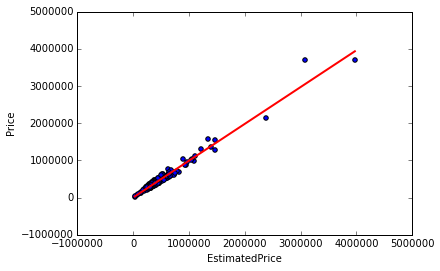

In [33]:
# first, plot the observed data
house_data.plot(kind='scatter', x='EstimatedPrice', y='Price')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [91]:
# Try selecting different variables or combinations of variables. Can you get a better fit?
#Price	Bath	CrimeIndex	MinutesToLoop	MilesToLake	Age	LotSizeSqft	HouseSizeSqft	SchoolIndex	EstimatedPrice
# Let's try just the estimated price
#bath, minutes, SchoolIndex
# create a fitted model in one line
lm = smf.ols(formula='Price ~ MilesToLake+Age+HouseSizeSqft+CrimeIndex+LotSizeSqft', data=house_data).fit()

# print the coefficients
lm.params

Intercept        555958.730778
MilesToLake      -92624.157291
Age               -1595.249131
HouseSizeSqft        94.126586
CrimeIndex        29162.790097
LotSizeSqft         102.306810
dtype: float64

In [92]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     14.63
Date:                Wed, 16 Dec 2015   Prob (F-statistic):           2.51e-12
Time:                        20:31:05   Log-Likelihood:                -3102.9
No. Observations:                 219   AIC:                             6218.
Df Residuals:                     213   BIC:                             6238.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       5.56e+05   2.39e+05      2.325      0.021      8.47e+04  1.03e+06
MilesToLake   -9.262e+04    6.8e+04     -1.363      0.174     -2.27e+05  4.13e+04
Age           -1595.2491    698.575     -2.284      0.023     -2972.255  -218.243
HouseSizeSqft    94.1266     36.845      2.555      0.011        21.500   166.753
CrimeIndex     2.916e+04    1.7e+04      1.717      0.088     -4324.643  6.27e+04
LotSizeSqft     102.3068     33.844      3.023      0.003        35.594   169.020
==============================================================================
Omnibus:                      299.281   Durbin-Watson:                   1.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23503.359
Skew:                           6.087   Prob(JB):                         0.00
Kurtosis:                      52.270   Cond. No.                     2.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

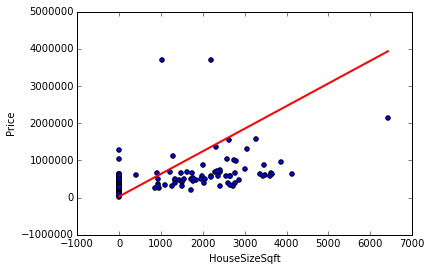

In [94]:
X_new = pd.DataFrame({'MilesToLake+Age+HouseSizeSqft+CrimeIndex+LotSizeSqft': [house_data.HouseSizeSqft.min(), house_data.HouseSizeSqft.max()]})
X_new.head()

# first, plot the observed data
house_data.plot(kind='scatter', x='HouseSizeSqft', y='Price')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)